# **PROBLEM 1**



Begin by writing down the prior distribution $p(\mathbf{w})$ and the likelihood $p(\mathbf{t|X,w},\beta)$:

$p(\mathbf{w})=\mathcal{N}(\mathbf{w|m_0, S_0})$ , $p(\mathbf{t|X,w},\beta)= \prod_{n=1}^N \mathcal{N}(\mathbf{t_n | w^T \phi(x_n)},\beta^{-1})$ 


The porsterior pdf equals to the product of the prior pdf and the likelihood function up to a normalization constant. We focus on the argument of exponential term of the product (graphically exp(--)).

$-- = - \frac{\beta}{2} \sum_{n=1}^{N} \mathbf {\{ t_n - w^T \phi(x_n)  \}^2 - \frac{1}{2} (w - m_0)^T S_0^{-1}(w - m_0) } = \\
  = - \frac{\beta}{2} \sum_{n=1}^{N} \mathbf {\{ t_n^2 - 2 t_n w^T \phi(x_n) + w^T \phi(x_n) \phi(x_n)^T    \} - \frac{1}{2} (w - m_0)^T S_0^{-1}(w - m_0)  = \\
 = - \frac{1}{2} w^T \left [   \sum_{n=1}^N \beta \phi(x_n) \phi(x_n)^T + S_0^{-1} \right ] w  - \frac{1}{2} \left [ -2 m_0^T S_0^{-1} - \sum_{n=1}^N \beta t_n \phi(x_n)^T  \right ] w }$

 By comparing the quadratic term of the above with the standard Gaussian distribution we get $\mathbf{S_N^{-1} = S_0^{-1} + \beta \Phi^T \Phi }$ and then by comparing the linear term with the standard Gaussian we can obtain 

 $\mathbf{-2 m_N^T S_N^{-1} = -2 m_0^T S_0^{-1} - \sum_{n=1}^N 2 \beta t_n \phi(x_n)^T}$

 and by performing some simple algebraic calculations we can verify the given relation.

 

# **PROBLEM 2**



a) 
We write down the prior distribution:

$$\mathbf{p(w) = \mathcal{N}(m_N, S_N)}$$

where $\mathbf{m}_N$ and $\mathbf{S}_N$ are given in Problem 1. If we observe that another sample ($\mathbf{X_{N+1}, t_{N+1}}$) we can write down the likelihood as:

$$p(t_{N+1} | \mathbf{x_{N+1}, w}) = \mathcal{N}(t_{N+1}| y(\mathbf{x_{N=1}, w}. \beta^{-1}))$$

Since the posterior equals the product of the prior with the likelihood, up to a constant, we can focus on the argument of exponential term again and get:

$$exp = \mathbf{ (w- m_N)^T S^{-1}_N (w - m_N) + \beta (t_{N+1} - w^T \phi(x_{N+1}))^2  = \\
= w^T \left [ S_N^{-1} + \beta \phi(x_{N+1})\phi(x_{N+1})^T \right] w - 2 w^T \left[  S_N^{-1} m_N + \beta \phi(x_{N+1}) t_{N+1}       \right ]  } $$

(We did not include the constant, but this is ok) After observing the new sample $\mathbf{(X_{N+1}, t_{N+1})}$ we have $\mathbf{p(w) = \mathcal{N}(m_{N+1}, S_{N+1})}$, where we have defined:

$$\mathbf{S^{-1}_{N+1} = S^{-1}_N + \beta \phi( x_{N+1}) \phi(x_{N+1})^T}$$

and 

$$\mathbf{m_{N+1} = S_{N+1} (S_N^{-1} m_N + \beta \phi(x_{N+1})t_{N+1})}$$

b) We know that the prior can be written as:
$$\mathbf{p(w) = \mathcal{N}(m_N, S_N)}$$

and the likelihood function $p(t_{N+1}| y\mathbf{x_{N+1}, w}), \beta^{-1})$can be written:

$$\mathbf{p(t_{N+1}| x_{N+1}, w) = \mathcal{N}(t_{N+1}| y(x_{N+1}, w)}, \beta^{-1})$$

According to the fact that $\mathbf{y(x_{N+1}, w) = w^T \phi(x_{N+1}) = \phi(x_{N+1})^T w}$, the likelihood can be written as:

$$\mathbf{p(t_{Ν+1} | x_{Ν+1},w) = \mathcal{N} t_{N+1}| (\phi(x_{N+1})^T w),\beta^{-1})}$$

Then we take advantage of the relations $\mathbf{p(x) = \mathcal{N} ( x|\mu, \Lambda^{-1})}$, $\mathbf{p(y|x) = \mathcal{N}(y | Ax + b, L^{-1})}$ and $\mathbf{p(x|y) = \mathcal{N} (x| \Sigma \{ A^T L (y-b) + \Lambda \mu\}, \Sigma)}$ and write:

$$\mathbf{p(w | x_{N+1}, t_{N+1}) = \mathcal{N}(\Sigma \{ \phi(x_{N+1} \beta t_{N+1} + S_N^{-1} m_N) \}, \Sigma)}$$, where 

$\mathbf{\Sigma = (S_N^{-1} + \phi (x_{N+1}) \beta \phi(x_{N+1})^T)^{-1}}$ and we can see that the result is the same as in the previous problem.




# **PROBLEM 3**

In [1]:
import numpy as np

class BayesianLinearRegression:
    def __init__(self, X, y, alpha = 1.0, beta = 1.0):
        self.X = X
        self.y = y
        self.alpha = alpha
        self.beta = beta
        self.jitter = 1e-8
      
    def fit_MLE(self): 
        xTx_inv = np.linalg.inv(np.matmul(self.X.T,self.X) + self.jitter)
        xTy = np.matmul(self.X.T, self.y)
        w_MLE = np.matmul(xTx_inv, xTy)
        self.w_MLE = w_MLE
        return w_MLE

    def fit_MAP(self): 
        Lambda = np.matmul(self.X.T,self.X) + (self.beta/self.alpha)*np.eye(self.X.shape[1])
        Lambda_inv = np.linalg.inv(Lambda)
        xTy = np.matmul(self.X.T, self.y)
        mu = np.matmul(Lambda_inv, xTy)
        self.w_MAP = mu
        self.Lambda_inv = Lambda_inv
        return mu, Lambda_inv
      
    def predictive_distribution(self, X_star):
        mean_star = np.matmul(X_star, self.w_MAP)
        var_star = 1.0/self.alpha + np.matmul(X_star, np.matmul(self.Lambda_inv, X_star.T))
        return mean_star, var_star


In [2]:
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
class basis_functions:
    def __init__(self, order):  
        self.order = order
        
    def monomial_basis(self,x):
        points = np.ones((x.shape[0],self.order))
        for i in range(1,self.order):
            points[:,i] = x.T**i
        return points
    
    def identity_basis(self,x):
        points = np.ones((x.shape[0],1))
        points[:,0] = x.T
        return points
    
    def legendre_basis(self,x):
        N = x.shape[0]
        output = np.zeros((N,self.order))
        for i in range(self.order):
            infer = np.polynomial.legendre.Legendre.basis(i, [0, 2.])
            output[:,i:i+1] = infer(x)
        return output    
        
    def fourier_basis(self,x):
        points = np.ones((x.shape[0],2*self.order))
        for i in range(0,self.order):
            points[:,2*i] = np.sin(i*np.pi*x).T
            points[:,2*i+1] = np.cos(i*np.pi*x).T
        return points

In [4]:
!pip install pydoe

  Created wheel for pydoe: filename=pyDOE-0.3.8-cp36-none-any.whl size=18178 sha256=c14c99402900ee6bb64d1aa46f95dcfdf8de5986c96c6ff9a5d468458792521c
  Stored in directory: /root/.cache/pip/wheels/7c/c8/58/a6493bd415e8ba5735082b5e0c096d7c1f2933077a8ce34544
Successfully built pydoe


In [ ]:
import numpy as np


class BayesianLinearRegression:
  """
    Linear regression model: y = (w.T)*x + \epsilon
    w ~ N(0,beta^(-1)I)
    P(y|x,w) ~ N(y|(w.T)*x,alpha^(-1)I)
  """
  def __init__(self, X, y, alpha = 1.0, beta = 1.0):
      
      self.X = X
      self.y = y
      
      self.alpha = alpha
      self.beta = beta
      
      self.jitter = 1e-6
      

  def fit_MLE(self): 
      xTx_inv = np.linalg.inv(np.matmul(self.X.T,self.X) + self.jitter)
      xTy = np.matmul(self.X.T, self.y)
      w_MLE = np.matmul(xTx_inv, xTy)
      
      self.w_MLE = w_MLE
      
      return w_MLE
      
  def fit_MAP(self): 
      Lambda = np.matmul(self.X.T,self.X) + \
               (self.beta/self.alpha)*np.eye(self.X.shape[1])
      Lambda_inv = np.linalg.inv(Lambda)
      xTy = np.matmul(self.X.T, self.y)
      mu = np.matmul(Lambda_inv, xTy)
      
      self.w_MAP = mu
      self.Lambda_inv = Lambda_inv
      
      return mu, Lambda_inv
      
  def predictive_distribution(self, X_star):
      mean_star = np.matmul(X_star, self.w_MAP)
      var_star = 1.0/self.alpha + \
                 np.matmul(X_star, np.matmul(self.Lambda_inv, X_star.T))
      return mean_star, var_star


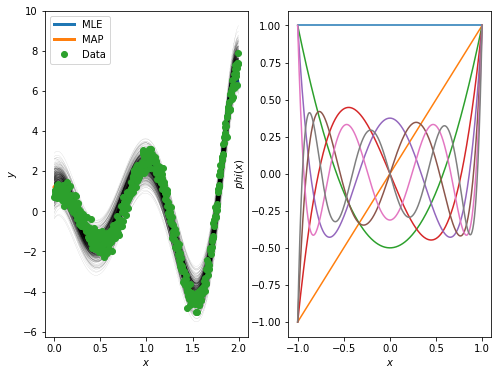

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from pyDOE import lhs
from scipy.special import legendre


class bases:
    def __init__(self, order):  
        self.order = order
        
    def monomial_basis(self,x):
        points = np.ones((x.shape[0],self.order))
        for i in range(1,self.order):
            points[:,i] = x.T**i
        return points
    
    def identity_basis(self,x):
        points = np.ones((x.shape[0],1))
        points[:,0] = x.T
        return points
    
    def legendre_basis(self,x):
        lp_array = np.empty(( len(x),self.order))
        for n in np.arange(self.order):
            LP = legendre(n)(x)
            lp_array[:,n] = LP.T
        return lp_array
        
    def fourier_basis(self,x):
        points = np.ones((x.shape[0],2*self.order))
        for i in range(0,self.order):
            points[:,2*i] = np.sin(i*np.pi*x).T
            points[:,2*i+1] = np.cos(i*np.pi*x).T
        return points

    
if __name__ == "__main__": 
    
    # N is the number of training points.
    N = 500
    noise_var = 0.3
    alpha = 5.
    beta = 0.1
    order = 8
    
    # Create random input and output data
    lb = 0.
    ub = 2.
    X = lb + (ub-lb)*lhs(1, N)
    y = np.exp(X)*np.cos(2.0*np.pi*X) + noise_var*np.random.randn(N,1)
    
    bases = bases(order)
    basis = bases.legendre_basis
    
    phi_x_m = basis(X)
    # Define model
    m = BayesianLinearRegression(phi_x_m, y, alpha, beta)
    
    # Fit MLE and MAP estimates for w
    w_MLE = m.fit_MLE()
    w_MAP, Lambda_inv = m.fit_MAP()
    # Predict at a set of test points
    X_star = np.linspace(lb,ub,N)[:,None]
    phi_star_m = basis(X_star)
    
    y_pred_MLE = np.matmul(phi_star_m, w_MLE)
    y_pred_MAP = np.matmul(phi_star_m, w_MAP)
    
    # Draw sampes from the predictive posterior
    num_samples = N
    mean_star, var_star = m.predictive_distribution(phi_star_m)
    samples = np.random.multivariate_normal(mean_star.flatten(), var_star, num_samples)
    
    # Plot
    plt.figure(1, figsize=(8,6))
    plt.subplot(1,2,1)
    plt.plot(X_star, y_pred_MLE, linewidth=3.0, label = 'MLE')
    plt.plot(X_star, y_pred_MAP, linewidth=3.0, label = 'MAP')
    for i in range(0, num_samples):
        plt.plot(X_star, samples[i,:], 'k', linewidth=0.05)
    plt.plot(X,y,'o', label = 'Data')
    plt.legend()
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.axis('tight')


    # Plot distribution of w
    plt.subplot(1,2,2)
    x_axis = np.linspace(-1., 1., N)[:,None]
    phi_axis_m = basis(x_axis)

    plt.plot(x_axis,phi_axis_m) 
    plt.xlabel('$x$')
    plt.ylabel('$phi(x)$')
    plt.axis('tight')

The objective of this problem is to understand that when you use a large number of features and a small number of samples the basis functions tend to overfit. In this case this is presented using the monomial basis function. For Fourier and Legendre basis functions, the accuracy is becoming better as the order of the polynomial increases. The identity basis function is insensitive of the order. The best choice for this data-set would probably be the Fourier basis as it provides the best results in most cases.
